In [95]:
import importlib
import logging

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from model_trainer import loader
from model_trainer.config import get_path

log = logging.getLogger(__name__)
importlib.reload(loader)

<module 'model_trainer.loader' from '/projects/model-trainer/model_trainer/loader.py'>

In [96]:
w2v_cbow_path = get_path("wiki-he", "cbow.kv")
w2v_cbow_model = loader.load_kv(w2v_cbow_path)

# w2v_sg_path = get_path("wiki-he", "sg.kv")
# w2v_cbow = loader.load_kv(w2v_cbow_path)

ft_path = get_path("wiki-he", "fasttext.kv")
ft_model = loader.load_kv(ft_path)

[14:33:09] loading KeyedVectors object from ./data/wiki-he/cbow.kv [gensim.utils]
[14:33:09] loading vectors from ./data/wiki-he/cbow.kv.vectors.npy with mmap=None [gensim.utils]
[14:33:09] KeyedVectors lifecycle event {'fname': './data/wiki-he/cbow.kv', 'datetime': '2021-12-11T14:33:09.731948', 'gensim': '4.1.2', 'python': '3.8.10 (default, Sep 28 2021, 16:10:42) \n[GCC 9.3.0]', 'platform': 'Linux-5.11.0-40-generic-x86_64-with-glibc2.29', 'event': 'loaded'} [gensim.utils]
[14:33:09] Vectors loaded [model_trainer.word2vec]
[14:33:09] loading KeyedVectors object from ./data/wiki-he/fasttext.kv [gensim.utils]
[14:33:10] loading vectors_vocab from ./data/wiki-he/fasttext.kv.vectors_vocab.npy with mmap=None [gensim.utils]
[14:33:10] loading vectors_ngrams from ./data/wiki-he/fasttext.kv.vectors_ngrams.npy with mmap=None [gensim.utils]
[14:33:10] setting ignored attribute vectors to None [gensim.utils]
[14:33:10] setting ignored attribute buckets_word to None [gensim.utils]
[14:33:37] FastT

In [97]:
w2v_cbow_vocab = set(w2v_cbow_model.key_to_index.keys())
ft_vocab = set(ft_model.key_to_index.keys())
common_vocab = w2v_cbow_vocab.intersection(ft_vocab)

s1, s2 = len(w2v_cbow_vocab), len(ft_vocab)
print(f"Vocabulary diff: {abs(s1 - s2)}")
print(f"Common vocab: {len(common_vocab)}")

Vocabulary diff: 1
Common vocab: 576850


In [199]:
import random

representative = "אקדח"  # random.sample(common_vocab, k=1)[0]
print(f"Representative: {representative}")

others_count = 1000
others = random.sample(common_vocab, k=others_count)
print(f"Others: {others}")

Representative: אקדח
Others: ['בלהטוטנות', 'כסת', 'ashkenaz', 'והמנגינה', 'ונקבוביות', 'לתואר', 'לקולטס', 'readiness', 'המשתית', 'barba', 'מייקרס', 'והמלחמה', 'משפחתא', 'נורסאלנד', 'ביסל', 'רומחיהם', 'מהפרובינציאליות', 'לאקסו', 'קבורתה', 'לוולוו', 'רניצקי', 'pickering', 'בלסקובאץ', 'שהרייטינג', 'טיסתו', 'הטרודוקסיה', 'kaspar', 'הזוגות', 'pessimism', 'מוגרבי', 'לאמפה', 'undo', 'המקדם', 'ולשלוש', 'לנוביה', 'השתרכו', 'ואיניאס', 'ושנשא', 'buzzin', 'טורקל', 'מעקה', 'בערעורו', 'והקפדני', 'חילוניותם', 'pyramide', 'נקפור', 'перед', 'ורקו', 'כשעונים', 'מבוטחים', 'והקתדרה', 'chromebit', 'ובתוכנת', 'תפקידו', 'ובמדבריות', 'לארנסטו', 'והסתלק', 'taku', 'hotnewhiphop', 'אנסידמוס', 'arpad', 'קארילה', 'שהחיקסוס', 'ובקלילות', 'angostura', 'לערבים', 'ויעקב', 'והדונייץ', 'קומבן', 'חשמליה', 'השרדותם', 'גהט', 'מנסחת', 'זופנצ', 'ובמוטיבים', 'גרימאלדי', 'כשאובמה', 'סילבסטרו', 'יאנזן', 'בלקפוט', 'tudományos', 'שהידידות', 'המוליכות', 'מאבונלי', 'טובאס', 'אגין', 'לטני', 'נשמתן', 'לקדר', 'סחרחרה', 'כמיכאיל', 'ולה

In [200]:
from typing import List
from gensim.models import KeyedVectors


def representative_distances(model: KeyedVectors, representative: str, others: List[str]) -> np.ndarray:
    return model.distances(representative, other_words=others)


w2v_cbow_distances = representative_distances(w2v_cbow_model, representative, others)
ft_distances = representative_distances(ft_model, representative, others)

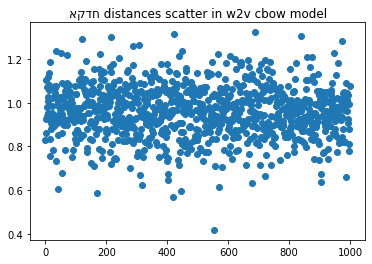

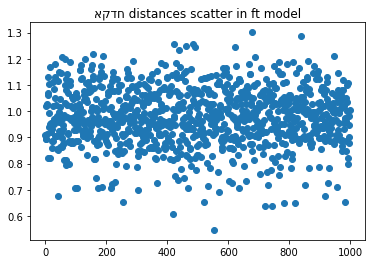

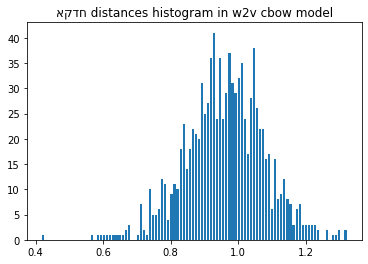

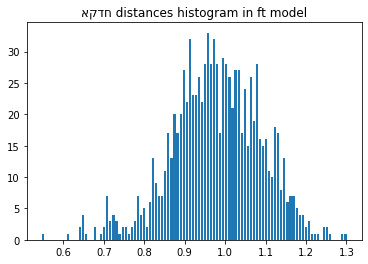

<Figure size 432x288 with 0 Axes>

In [201]:
def draw_distances_scatter(distances: np.ndarray, representative: str = None, model_name: str = None):
    x = np.arange(len(distances))
    plt.scatter(x, distances)
    if representative:
        title = f"{representative} distances scatter"
        if model_name:
            title += f" in {model_name} model"
        plt.title(title)
    plt.show()
    plt.clf()


def draw_distances_histogram(
    distances: np.ndarray, bins: int = None, representative: str = None, model_name: str = None
):
    if bins is None:
        bins = int(len(distances) / 10)
    plt.hist(distances, bins=bins, rwidth=0.7)
    if representative:
        title = f"{representative} distances histogram"
        if model_name:
            title += f" in {model_name} model"
        plt.title(title)
    plt.show()
    plt.clf()


draw_distances_scatter(w2v_cbow_distances, representative=representative, model_name="w2v cbow")
draw_distances_scatter(ft_distances, representative=representative, model_name="ft")
draw_distances_histogram(w2v_cbow_distances, representative=representative, model_name="w2v cbow")
draw_distances_histogram(ft_distances, representative=representative, model_name="ft")

In [202]:
def edges(distances: np.ndarray, others: List[str], top_n: int = 15) -> List[str]:
    indexes = np.argsort(distances)[:top_n]
    return [others[i] for i in indexes]


print(f"For representative: {representative}")
edges1 = edges(w2v_cbow_distances, others=others)
edges2 = edges(ft_distances, others=others)

df = pd.DataFrame()
df["w2v"] = edges1
df["ft"] = edges2

print(df)

For representative: אקדח
          w2v         ft
0        מזרק       מזרק
1        הלהב       הלהב
2       בקירק      כדואר
3      jigsaw     מאובזר
4        מעקה       שרפר
5   סטילגרייב      מתחבט
6     לכיוונה        mmh
7        וסיר       גרנק
8       ומגדש      מדפדף
9       וילמר      פרקוף
10     ברמזור       מעקה
11     מאובזר  סטילגרייב
12      ובענה    למחסנית
13      בבולט     שמזדקר
14     ובכעסו       יירט
